## <strong>Ensemble Analysis</strong>

Analysis of Ensemble techniques using three transformer models Albert, Roberta and Deberta.

In [1]:
!pip list

Package                       Version
----------------------------- --------------
absl-py                       0.12.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.1.0
appdirs                       1.4.4
argcomplete                   1.12.3
argon2-cffi                   20.1.0
arviz                         0.11.2
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.2.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.0.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.2
branca                        0.4.2
bs4                           0.0.1
CacheControl

In [2]:
!pip install datasets

     |████████████████████████████████| 264 kB 12.8 MB/s 
     |████████████████████████████████| 243 kB 83.1 MB/s 
     |████████████████████████████████| 118 kB 59.7 MB/s 
     |████████████████████████████████| 43 kB 1.9 MB/s 


In [3]:
!pip install rouge_score

In [4]:
!pip install -U strsimpy

     |████████████████████████████████| 45 kB 2.7 MB/s 


In [5]:
import pandas as pd
from psutil import virtual_memory
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datasets import load_metric
from datasets import list_metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from rouge_score import rouge_scorer
from strsimpy.jaro_winkler import JaroWinkler

In [6]:
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [7]:
drive.mount('/content/drive')


Mounted at /content/drive


# Albert Traning Loss Analysis

Albert training loss analysis and visualization

In [8]:
albert_training_loss_df = pd.read_csv('./drive/MyDrive/Research_Transformer/models/albert/albert_training_loss.tsv', delimiter='\t', encoding='UTF-8', skiprows = 1, names=['step','training_loss'])


In [9]:
albert_training_loss_df.shape


(60, 2)

In [10]:
albert_training_loss_df


,step,training_loss
0,500,0.5762
1,1000,0.7288
2,1500,0.5848
3,2000,0.5405
4,2500,0.6100
5,3000,0.6947
6,3500,0.7140
7,4000,0.6567
8,4500,0.6783
9,5000,0.5941


In [11]:
roberta_training_loss_df = pd.read_csv('./drive/MyDrive/Research_Transformer/models/roberta/roberta_training_loss.tsv', delimiter='\t', encoding='UTF-8', skiprows = 1, names=['step','training_loss'])


In [12]:
roberta_training_loss_df.shape


(60, 2)

In [13]:
roberta_training_loss_df


,step,training_loss
0,500,1.1473
1,1000,1.5069
2,1500,1.5780
3,2000,1.4277
4,2500,1.4087
5,3000,1.5849
6,3500,1.4276
7,4000,1.5350
8,4500,1.4260
9,5000,1.3345


In [14]:
deberta_training_loss_df = pd.read_csv('./drive/MyDrive/Research_Transformer/models/deberta/deberta_training_loss.tsv', delimiter='\t', encoding='UTF-8', skiprows = 1, names=['step','training_loss'])


In [15]:
deberta_training_loss_df.shape


(60, 2)

In [16]:
deberta_training_loss_df


,step,training_loss
0,500,1.9972
1,1000,1.7739
2,1500,1.6908
3,2000,1.5506
4,2500,1.6143
5,3000,1.5935
6,3500,1.5428
7,4000,1.5282
8,4500,1.5385
9,5000,1.4653


In [17]:
plt.style.available


['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [18]:
albert_training_loss_df

,step,training_loss
0,500,0.5762
1,1000,0.7288
2,1500,0.5848
3,2000,0.5405
4,2500,0.6100
5,3000,0.6947
6,3500,0.7140
7,4000,0.6567
8,4500,0.6783
9,5000,0.5941


In [19]:
albert_training_loss_df_epoch1 = albert_training_loss_df.iloc[:20,:]
albert_training_loss_df_epoch2 = albert_training_loss_df.iloc[20:40,:]
albert_training_loss_df_epoch3 = albert_training_loss_df.iloc[40:60,:]


In [20]:
albert_training_loss_df_epoch1.shape

(20, 2)

In [21]:
albert_training_loss_df_epoch2.shape

(20, 2)

In [22]:
albert_training_loss_df_epoch3.shape

(20, 2)

In [23]:
albert_training_loss_df_epoch1

,step,training_loss
0,500,0.5762
1,1000,0.7288
2,1500,0.5848
3,2000,0.5405
4,2500,0.6100
5,3000,0.6947
6,3500,0.7140
7,4000,0.6567
8,4500,0.6783
9,5000,0.5941


In [24]:
albert_training_loss_df_epoch2

,step,training_loss
20,10500,0.3966
21,11000,0.3713
22,11500,0.4359
23,12000,0.4004
24,12500,0.3297
25,13000,0.3587
26,13500,0.3420
27,14000,0.3849
28,14500,0.4401
29,15000,0.4512


In [25]:
albert_training_loss_df_epoch2['step'] = albert_training_loss_df_epoch2['step'].apply(lambda x : x - 10000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
albert_training_loss_df_epoch2

,step,training_loss
20,500,0.3966
21,1000,0.3713
22,1500,0.4359
23,2000,0.4004
24,2500,0.3297
25,3000,0.3587
26,3500,0.3420
27,4000,0.3849
28,4500,0.4401
29,5000,0.4512


In [27]:
albert_training_loss_df_epoch3

,step,training_loss
40,20500,0.2609
41,21000,0.1217
42,21500,0.1712
43,22000,0.1451
44,22500,0.1484
45,23000,0.2188
46,23500,0.2264
47,24000,0.1346
48,24500,0.2059
49,25000,0.1737


In [28]:
albert_training_loss_df_epoch3['step'] = albert_training_loss_df_epoch3['step'].apply(lambda x : x - 20000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
albert_training_loss_df_epoch3

,step,training_loss
40,500,0.2609
41,1000,0.1217
42,1500,0.1712
43,2000,0.1451
44,2500,0.1484
45,3000,0.2188
46,3500,0.2264
47,4000,0.1346
48,4500,0.2059
49,5000,0.1737


In [30]:
color = sns.color_palette("pastel")

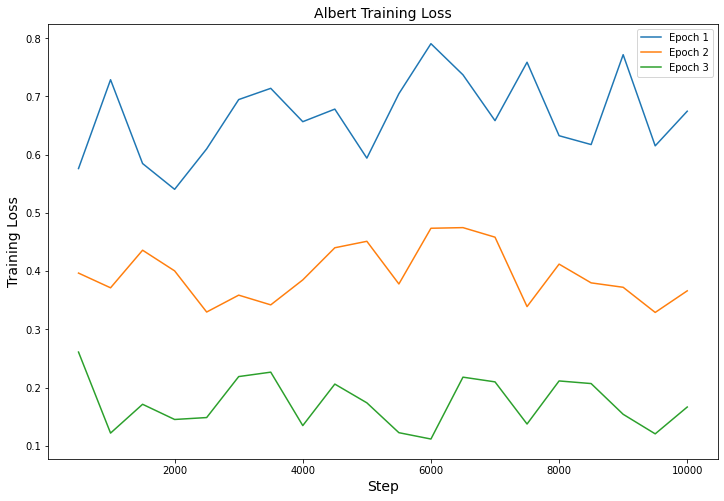

In [31]:
plt.figure(figsize=(12,8))
plt.plot(albert_training_loss_df_epoch1['step'].values, albert_training_loss_df_epoch1['training_loss'].values, label='Epoch 1')
plt.plot(albert_training_loss_df_epoch2['step'].values, albert_training_loss_df_epoch2['training_loss'].values, label='Epoch 2')
plt.plot(albert_training_loss_df_epoch3['step'].values, albert_training_loss_df_epoch3['training_loss'].values, label='Epoch 3')
plt.ylabel('Training Loss',fontsize=14)
plt.xlabel('Step', fontsize=14)
plt.title('Albert Training Loss', fontsize=14)
plt.legend()
plt.savefig('./drive/MyDrive/Research_Transformer/graphs/Albert Training Loss.jpeg')
plt.show()

# Roberta Traning Loss Analysis

Roberta training loss analysis and visualization

In [32]:
roberta_training_loss_df

,step,training_loss
0,500,1.1473
1,1000,1.5069
2,1500,1.5780
3,2000,1.4277
4,2500,1.4087
5,3000,1.5849
6,3500,1.4276
7,4000,1.5350
8,4500,1.4260
9,5000,1.3345


In [33]:
roberta_training_loss_df

,step,training_loss
0,500,1.1473
1,1000,1.5069
2,1500,1.5780
3,2000,1.4277
4,2500,1.4087
5,3000,1.5849
6,3500,1.4276
7,4000,1.5350
8,4500,1.4260
9,5000,1.3345


In [34]:
roberta_training_loss_df_epoch1 = roberta_training_loss_df.iloc[:20,:]
roberta_training_loss_df_epoch2 = roberta_training_loss_df.iloc[20:40,:]
roberta_training_loss_df_epoch3 = roberta_training_loss_df.iloc[40:60,:]

In [35]:
roberta_training_loss_df_epoch1.shape

(20, 2)

In [36]:
roberta_training_loss_df_epoch2.shape

(20, 2)

In [37]:
roberta_training_loss_df_epoch3.shape

(20, 2)

In [38]:
roberta_training_loss_df_epoch2

,step,training_loss
20,10500,0.8411
21,11000,1.1233
22,11500,0.7343
23,12000,1.0054
24,12500,0.8241
25,13000,0.8873
26,13500,0.8972
27,14000,1.0726
28,14500,0.8342
29,15000,0.9674


In [39]:
roberta_training_loss_df_epoch2['step'] = roberta_training_loss_df_epoch2['step'].apply(lambda x : x - 10000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
roberta_training_loss_df_epoch2

,step,training_loss
20,500,0.8411
21,1000,1.1233
22,1500,0.7343
23,2000,1.0054
24,2500,0.8241
25,3000,0.8873
26,3500,0.8972
27,4000,1.0726
28,4500,0.8342
29,5000,0.9674


In [41]:
roberta_training_loss_df_epoch3

,step,training_loss
40,20500,0.5672
41,21000,0.4380
42,21500,0.4939
43,22000,0.6240
44,22500,0.5255
45,23000,0.5937
46,23500,0.6132
47,24000,0.6162
48,24500,0.5985
49,25000,0.5172


In [42]:
roberta_training_loss_df_epoch3['step'] = roberta_training_loss_df_epoch3['step'].apply(lambda x : x - 20000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
roberta_training_loss_df_epoch3

,step,training_loss
40,500,0.5672
41,1000,0.4380
42,1500,0.4939
43,2000,0.6240
44,2500,0.5255
45,3000,0.5937
46,3500,0.6132
47,4000,0.6162
48,4500,0.5985
49,5000,0.5172


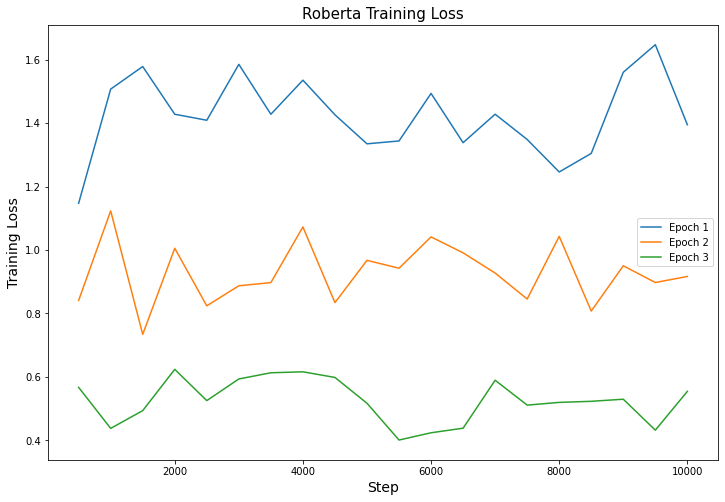

In [44]:
plt.figure(figsize=(12,8))
plt.plot(roberta_training_loss_df_epoch1['step'].values, roberta_training_loss_df_epoch1['training_loss'].values, label='Epoch 1')
plt.plot(roberta_training_loss_df_epoch2['step'].values, roberta_training_loss_df_epoch2['training_loss'].values, label='Epoch 2')
plt.plot(roberta_training_loss_df_epoch3['step'].values, roberta_training_loss_df_epoch3['training_loss'].values, label='Epoch 3')
plt.ylabel('Training Loss',fontsize=14)
plt.xlabel('Step', fontsize=14)
plt.title('Roberta Training Loss', fontsize=15)
plt.legend()
plt.savefig('./drive/MyDrive/Research_Transformer/graphs/Roberta Training Loss.jpeg')
plt.show()

# Deberta Traning Loss Analysis

Deberta training loss analysis and visualization

In [45]:
deberta_training_loss_df

,step,training_loss
0,500,1.9972
1,1000,1.7739
2,1500,1.6908
3,2000,1.5506
4,2500,1.6143
5,3000,1.5935
6,3500,1.5428
7,4000,1.5282
8,4500,1.5385
9,5000,1.4653


In [46]:
deberta_training_loss_df_epoch1 = deberta_training_loss_df.iloc[:20,:]
deberta_training_loss_df_epoch2 = deberta_training_loss_df.iloc[20:40,:]
deberta_training_loss_df_epoch3 = deberta_training_loss_df.iloc[40:60,:]

In [47]:
deberta_training_loss_df_epoch1.shape

(20, 2)

In [48]:
deberta_training_loss_df_epoch2.shape

(20, 2)

In [49]:
deberta_training_loss_df_epoch3.shape

(20, 2)

In [50]:
deberta_training_loss_df_epoch2

,step,training_loss
20,10500,0.8792
21,11000,1.1118
22,11500,0.8054
23,12000,0.9826
24,12500,0.9614
25,13000,0.9345
26,13500,0.8834
27,14000,1.0531
28,14500,0.8423
29,15000,1.0163


In [51]:
deberta_training_loss_df_epoch2['step'] = deberta_training_loss_df_epoch2['step'].apply(lambda x : x - 10000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
deberta_training_loss_df_epoch2

,step,training_loss
20,500,0.8792
21,1000,1.1118
22,1500,0.8054
23,2000,0.9826
24,2500,0.9614
25,3000,0.9345
26,3500,0.8834
27,4000,1.0531
28,4500,0.8423
29,5000,1.0163


In [53]:
deberta_training_loss_df_epoch3

,step,training_loss
40,20500,0.5934
41,21000,0.5070
42,21500,0.5653
43,22000,0.4264
44,22500,0.6140
45,23000,0.5197
46,23500,0.5703
47,24000,0.6307
48,24500,0.5155
49,25000,0.4378


In [54]:
deberta_training_loss_df_epoch3['step'] = deberta_training_loss_df_epoch3['step'].apply(lambda x : x - 20000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
deberta_training_loss_df_epoch3

,step,training_loss
40,500,0.5934
41,1000,0.5070
42,1500,0.5653
43,2000,0.4264
44,2500,0.6140
45,3000,0.5197
46,3500,0.5703
47,4000,0.6307
48,4500,0.5155
49,5000,0.4378


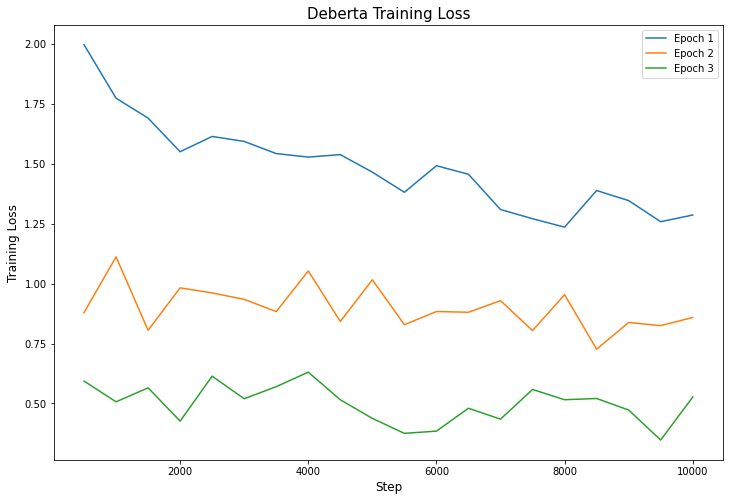

In [56]:
plt.figure(figsize=(12,8))
plt.plot(deberta_training_loss_df_epoch1['step'].values, deberta_training_loss_df_epoch1['training_loss'].values, label='Epoch 1')
plt.plot(deberta_training_loss_df_epoch2['step'].values, deberta_training_loss_df_epoch2['training_loss'].values, label='Epoch 2')
plt.plot(deberta_training_loss_df_epoch3['step'].values, deberta_training_loss_df_epoch3['training_loss'].values, label='Epoch 3')
plt.ylabel('Training Loss',fontsize=12)
plt.xlabel('Step', fontsize=12)
plt.title('Deberta Training Loss', fontsize=15)
plt.legend()
plt.savefig('./drive/MyDrive/Research_Transformer/graphs/Deberta Training Loss.jpeg')
plt.show()

# Average Traning Loss Analysis

Average training loss analysis and visualization of three models

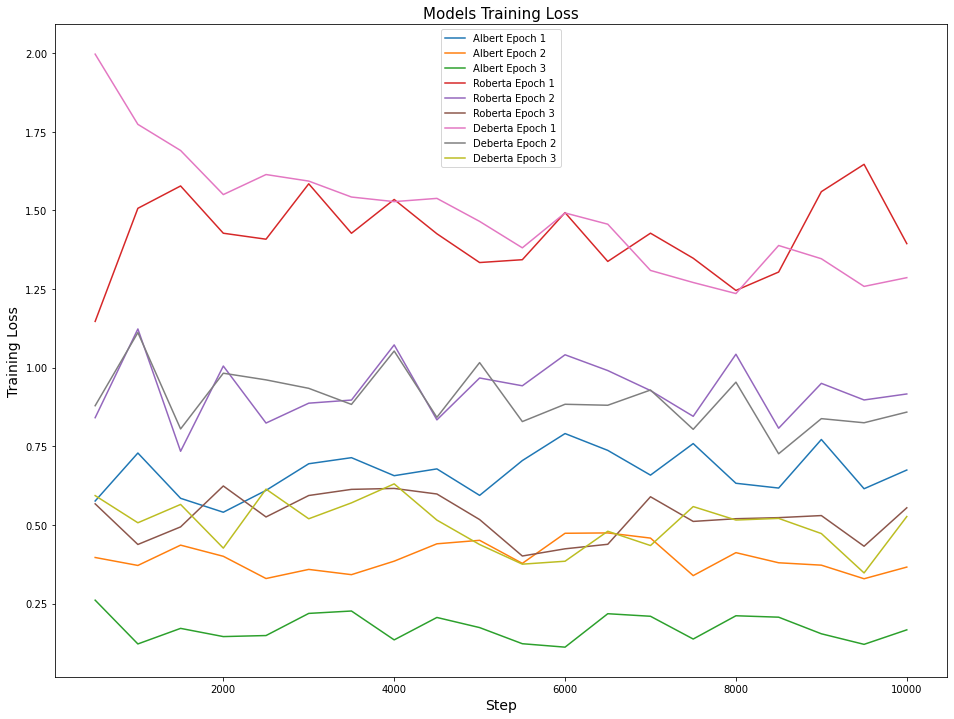

In [57]:
plt.figure(figsize=(16,12))
plt.plot(albert_training_loss_df_epoch1['step'].values, albert_training_loss_df_epoch1['training_loss'].values, label='Albert Epoch 1')
plt.plot(albert_training_loss_df_epoch2['step'].values, albert_training_loss_df_epoch2['training_loss'].values, label='Albert Epoch 2')
plt.plot(albert_training_loss_df_epoch3['step'].values, albert_training_loss_df_epoch3['training_loss'].values, label='Albert Epoch 3')
plt.plot(roberta_training_loss_df_epoch1['step'].values, roberta_training_loss_df_epoch1['training_loss'].values, label='Roberta Epoch 1')
plt.plot(roberta_training_loss_df_epoch2['step'].values, roberta_training_loss_df_epoch2['training_loss'].values, label='Roberta Epoch 2')
plt.plot(roberta_training_loss_df_epoch3['step'].values, roberta_training_loss_df_epoch3['training_loss'].values, label='Roberta Epoch 3')
plt.plot(deberta_training_loss_df_epoch1['step'].values, deberta_training_loss_df_epoch1['training_loss'].values, label='Deberta Epoch 1')
plt.plot(deberta_training_loss_df_epoch2['step'].values, deberta_training_loss_df_epoch2['training_loss'].values, label='Deberta Epoch 2')
plt.plot(deberta_training_loss_df_epoch3['step'].values, deberta_training_loss_df_epoch3['training_loss'].values, label='Deberta Epoch 3')
plt.ylabel('Training Loss',fontsize=14)
plt.xlabel('Step', fontsize=14)
plt.title('Models Training Loss', fontsize=15)
plt.legend()
plt.savefig('./drive/MyDrive/Research_Transformer/graphs/Models Training Loss.jpeg')
plt.show()

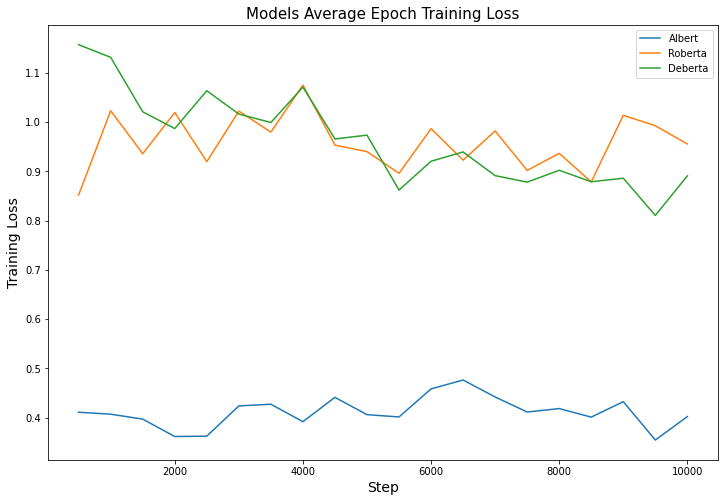

In [58]:
plt.figure(figsize=(12,8))
plt.plot(albert_training_loss_df_epoch1['step'].values, (albert_training_loss_df_epoch1['training_loss'].values+albert_training_loss_df_epoch2['training_loss'].values+albert_training_loss_df_epoch3['training_loss'].values)/3, label='Albert')
plt.plot(roberta_training_loss_df_epoch1['step'].values, (roberta_training_loss_df_epoch1['training_loss'].values+roberta_training_loss_df_epoch2['training_loss'].values+roberta_training_loss_df_epoch3['training_loss'].values)/3, label='Roberta')
plt.plot(deberta_training_loss_df_epoch1['step'].values, (deberta_training_loss_df_epoch1['training_loss'].values+deberta_training_loss_df_epoch2['training_loss'].values+deberta_training_loss_df_epoch3['training_loss'].values)/3, label='Deberta')
plt.ylabel('Training Loss',fontsize=14)
plt.xlabel('Step', fontsize=14)
plt.title('Models Average Epoch Training Loss', fontsize=15)
plt.legend()
plt.savefig('./drive/MyDrive/Research_Transformer/graphs/Models Average Epoch Training Loss.jpeg')
plt.show()

# Evaluation Loss Analysis

Evaluation loss analysis and visualization of three models

In [59]:
albert_eval_loss = pd.read_csv('./drive/MyDrive/Research_Transformer/models/albert/albert_eval_loss.csv', encoding='UTF-8')

In [60]:
albert_eval_loss

,eval_loss
0,1.482863


In [61]:
roberta_eval_loss = pd.read_csv('./drive/MyDrive/Research_Transformer/models/roberta/roberta_eval_loss.csv', encoding='UTF-8')

In [62]:
roberta_eval_loss

,eval_loss
0,2.418659


In [63]:
deberta_eval_loss = pd.read_csv('./drive/MyDrive/Research_Transformer/models/deberta/deberta_eval_loss.csv', encoding='UTF-8')

In [64]:
deberta_eval_loss

,eval_loss
0,2.397642


In [65]:
models_eval_loss = pd.DataFrame({'models': ['albert', 'roberta', 'deberta'],
        'eval_loss': [albert_eval_loss['eval_loss'].values[0], roberta_eval_loss['eval_loss'].values[0], deberta_eval_loss['eval_loss'].values[0]],
        'per_gpu_eval_batch_size': [6000,6000,6000]}
        )

In [66]:
models_eval_loss.shape

(3, 3)

In [67]:
models_eval_loss

,models,eval_loss,per_gpu_eval_batch_size
0,albert,1.482863,6000
1,roberta,2.418659,6000
2,deberta,2.397642,6000


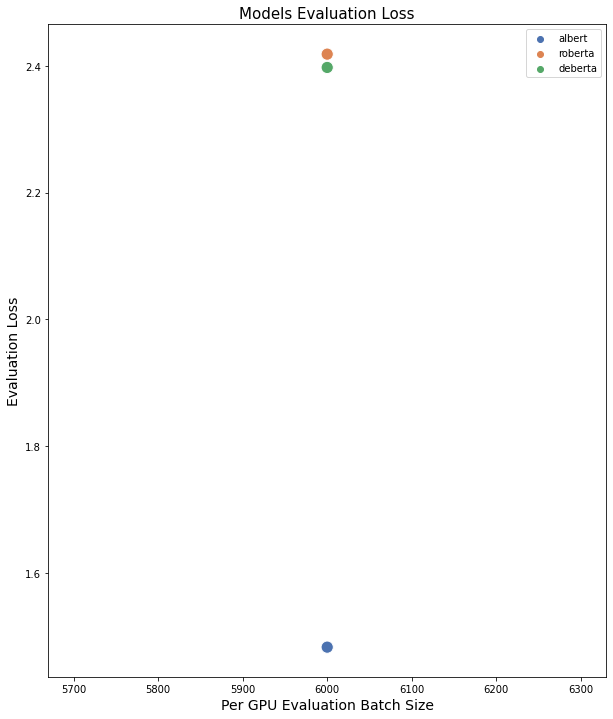

In [68]:
plt.figure(figsize=(10,12))
fig = sns.scatterplot(data=models_eval_loss, x="per_gpu_eval_batch_size", y="eval_loss", hue="models", s=150, palette='deep')
plt.ylabel('Evaluation Loss',fontsize=14)
plt.xlabel('Per GPU Evaluation Batch Size', fontsize=14)
plt.title('Models Evaluation Loss', fontsize=15)
plt.legend()
plt.savefig('./drive/MyDrive/Research_Transformer/graphs/Models Evaluation Loss.jpeg')
plt.show()

# Model Performance Analysis

## Albert Performance Analysis

Performance Analysis of Albert model

In [69]:
human_annotated_answer_df = pd.read_csv('./drive/MyDrive/Research_Transformer/test/test_qa_5k.csv')

In [70]:
human_annotated_answer_df.shape

(5000, 4)

In [71]:
human_annotated_answer_df

,context,question,answer_text,answer_start
0,Required attendance at school is 10 years for ...,How long are females required to go to school?,11 years,56
1,Required attendance at school is 10 years for ...,What was the literacy rate on Tuvalu in 2002?,99.0%,112
2,Required attendance at school is 10 years for ...,How many students were in Tuvalu schools in 2010?,"1,918",146
3,Required attendance at school is 10 years for ...,What si the teacher-student ratio for Tuvalu s...,1:18,292
4,Community Training Centres (CTCs) have been es...,What type of school has Tuvalu set up on each ...,Community Training Centres,0
...,...,...,...,...
4995,"In the years that followed, Eisenhower increas...",How many soldiers did Eisenhower ultimately se...,900,106
4996,"In the years that followed, Eisenhower increas...",How many days did the President of South Vietn...,ten,313
4997,"In the years that followed, Eisenhower increas...",Where was a parade held for the President of S...,New York City,416
4998,"In the years that followed, Eisenhower increas...",Who was Secretary of State in 1957?,John Foster Dulles,497


In [72]:
albert_result = pd.read_csv('./drive/MyDrive/Research_Transformer/models/albert/albert_result.csv')

In [73]:
albert_result.shape

(5000, 4)

In [74]:
albert_result

,answer,score,start,end
0,11 years,0.999942,55,64
1,99.0%,0.999989,111,117
2,"1,918",0.999991,145,151
3,1:27.,0.987609,385,391
4,Community Training Centres,0.999957,0,26
...,...,...,...,...
4995,900,0.999637,105,109
4996,ten,0.998241,312,316
4997,New York City.,0.999985,415,430
4998,John Foster Dulles,0.999990,496,515


In [75]:
print(list_metrics())

['accuracy', 'bertscore', 'bleu', 'bleurt', 'cer', 'comet', 'coval', 'cuad', 'f1', 'gleu', 'glue', 'indic_glue', 'matthews_correlation', 'meteor', 'pearsonr', 'precision', 'recall', 'rouge', 'sacrebleu', 'sari', 'seqeval', 'spearmanr', 'squad', 'squad_v2', 'super_glue', 'wer', 'wiki_split', 'xnli']


In [76]:
squad_metric = load_metric('squad_v2')

Downloading:   0%|          | 0.00/2.26k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.18k [00:00<?, ?B/s]

In [77]:
squad_metric

Metric(name: "squad_v2", features: {'predictions': {'id': Value(dtype='string', id=None), 'prediction_text': Value(dtype='string', id=None), 'no_answer_probability': Value(dtype='float32', id=None)}, 'references': {'id': Value(dtype='string', id=None), 'answers': Sequence(feature={'text': Value(dtype='string', id=None), 'answer_start': Value(dtype='int32', id=None)}, length=-1, id=None)}}, usage: """
Computes SQuAD v2 scores (F1 and EM).
Args:
    predictions: List of triple for question-answers to score with the following elements:
        - the question-answer 'id' field as given in the references (see below)
        - the text of the answer
        - the probability that the question has no answer
    references: List of question-answers dictionaries with the following key-values:
            - 'id': id of the question-answer pair (see above),
            - 'answers': a list of Dict {'text': text of the answer as a string}
    no_answer_threshold: float
        Probability threshold

In [78]:
albert_result['answer']

0                                  11 years
1                                     99.0%
2                                     1,918
3                                     1:27.
4                Community Training Centres
                       ...                 
4995                                    900
4996                                    ten
4997                         New York City.
4998                     John Foster Dulles
4999     there were no better alternatives.
Name: answer, Length: 5000, dtype: object

In [79]:
human_annotated_answer_df['answer_text']

0                                11 years
1                                   99.0%
2                                   1,918
3                                    1:18
4              Community Training Centres
                      ...                
4995                                  900
4996                                  ten
4997                        New York City
4998                   John Foster Dulles
4999    there were no better alternatives
Name: answer_text, Length: 5000, dtype: object

In [80]:
albert_result_list = albert_result['answer'].values.tolist()

In [81]:
len(albert_result_list)

5000

In [82]:
albert_result_list

[' 11 years',
 ' 99.0%',
 ' 1,918',
 ' 1:27.',
 'Community Training Centres',
 ' vocational training',
 ' secondary education.',
 ' Adults',
 ' basic carpentry, gardening and farming, sewing and cooking.',
 ' plants and trees',
 ' Pouka,',
 ' fibre',
 ' nails',
 ' dried coconut fibre.',
 ' shells',
 ' clothing',
 ' mats and fans.',
 ' everyday life',
 ' dance songs',
 ' fish',
 ' coconut',
 ' animal milk.',
 ' seabirds',
 ' fateles',
 ' meeting hall,',
 ' wedding celebrations',
 ' council of elders',
 ' decision making body',
 ' Aganu',
 ' kilikiti,',
 ' cricket.',
 ' Ano,',
 ' Christian missionaries',
 ' two round balls',
 ' Tuau Lapua Lapua',
 ' 2013 Pacific Mini Games,',
 ' weightlifting',
 ' Telupe Iosefa',
 ' powerlifting',
 ' "Independence Day Sports Festival"',
 ' Tuvalu Games,',
 ' 1998,',
 ' weightlifter',
 ' 100 metre sprints',
 ' 5.6% per annum.',
 ' 1.5%',
 ' fuel and food',
 ' zero',
 ' economic growth prospects as generally positive as the result of large revenues',
 ' Na

In [83]:
human_annotated_answer_list = human_annotated_answer_df['answer_text'].values.tolist()

In [84]:
len(human_annotated_answer_list)

5000

In [85]:
human_annotated_answer_list

['11 years',
 '99.0%',
 '1,918',
 '1:18',
 'Community Training Centres',
 'vocational training',
 'secondary education',
 'Adults',
 'basic',
 'plants and trees',
 'broadleaf forest',
 'fibre',
 'nails',
 'dried coconut fibre',
 'shells',
 'clothing',
 'mats and fans',
 'everyday life',
 'dance songs',
 'fish',
 'coconut',
 'animal',
 'seabirds',
 'fateles',
 'meeting hall',
 'celebrations',
 'council of elders',
 'decision making body',
 'Aganu',
 'kilikiti',
 'cricket',
 'Ano',
 'Christian missionaries',
 'two hard balls',
 'Tuau Lapua Lapua',
 'Pacific Mini Games',
 'weightlifting',
 'Telupe Iosefa',
 'powerlifting',
 'Independence Day Sports Festival',
 'Tuvalu Games',
 '1998',
 'weightlifter',
 '100 metre sprints',
 '5.6%',
 '1.5%',
 'fuel and food',
 'zero growth',
 'large revenues',
 'National Bank of Tuvalu',
 '65%',
 'overseas',
 'seamen',
 'agriculture and fishing.',
 'Tuvalu Maritime Training Institute',
 '120',
 "Tuvalu Overseas Seamen's Union",
 'on foreign ships',
 '800',

In [86]:
human_annotated_answer_start = human_annotated_answer_df['answer_start'].values.tolist()

In [87]:
len(human_annotated_answer_start)

5000

In [88]:
human_annotated_answer_start

[56,
 112,
 146,
 292,
 0,
 115,
 231,
 497,
 279,
 41,
 74,
 307,
 430,
 520,
 41,
 161,
 224,
 394,
 639,
 80,
 48,
 205,
 423,
 516,
 80,
 167,
 304,
 340,
 516,
 40,
 70,
 185,
 501,
 240,
 311,
 291,
 397,
 550,
 636,
 31,
 160,
 296,
 309,
 890,
 155,
 229,
 296,
 453,
 1158,
 37,
 98,
 244,
 347,
 573,
 62,
 169,
 290,
 396,
 462,
 435,
 157,
 375,
 489,
 749,
 42,
 444,
 485,
 854,
 1172,
 65,
 100,
 122,
 378,
 453,
 0,
 76,
 125,
 805,
 196,
 19,
 42,
 147,
 200,
 502,
 0,
 91,
 274,
 702,
 587,
 34,
 133,
 209,
 306,
 522,
 109,
 365,
 475,
 552,
 220,
 105,
 25,
 260,
 744,
 1005,
 49,
 258,
 361,
 532,
 694,
 127,
 4,
 356,
 508,
 756,
 0,
 161,
 237,
 428,
 547,
 3,
 203,
 478,
 15,
 385,
 15,
 158,
 199,
 237,
 271,
 0,
 55,
 476,
 298,
 399,
 85,
 3,
 396,
 534,
 831,
 53,
 70,
 320,
 162,
 44,
 661,
 620,
 152,
 300,
 22,
 329,
 384,
 460,
 221,
 44,
 209,
 124,
 429,
 55,
 86,
 379,
 439,
 648,
 15,
 160,
 620,
 259,
 4,
 250,
 418,
 451,
 574,
 0,
 111,
 368,
 607,
 

In [89]:
albert_result_dict = [{'prediction_text': str(v), 'id': str(k), 'no_answer_probability' : 0.0} for k, v in enumerate(albert_result_list)]

In [90]:
len(albert_result_dict)

5000

In [91]:
albert_result_dict

[{'id': '0', 'no_answer_probability': 0.0, 'prediction_text': ' 11 years'},
 {'id': '1', 'no_answer_probability': 0.0, 'prediction_text': ' 99.0%'},
 {'id': '2', 'no_answer_probability': 0.0, 'prediction_text': ' 1,918'},
 {'id': '3', 'no_answer_probability': 0.0, 'prediction_text': ' 1:27.'},
 {'id': '4',
  'no_answer_probability': 0.0,
  'prediction_text': 'Community Training Centres'},
 {'id': '5',
  'no_answer_probability': 0.0,
  'prediction_text': ' vocational training'},
 {'id': '6',
  'no_answer_probability': 0.0,
  'prediction_text': ' secondary education.'},
 {'id': '7', 'no_answer_probability': 0.0, 'prediction_text': ' Adults'},
 {'id': '8',
  'no_answer_probability': 0.0,
  'prediction_text': ' basic carpentry, gardening and farming, sewing and cooking.'},
 {'id': '9',
  'no_answer_probability': 0.0,
  'prediction_text': ' plants and trees'},
 {'id': '10', 'no_answer_probability': 0.0, 'prediction_text': ' Pouka,'},
 {'id': '11', 'no_answer_probability': 0.0, 'prediction_t

In [92]:
range_list = range(0,5000)
range_list_index = []
for i in range_list:
  range_list_index.append(i)

In [93]:
len(range_list_index)

5000

In [94]:
human_annotated_answer_dict = [{'answers': {'answer_start': [a], 'text': [str(b)]}, 'id': str(c)} for a, b, c in zip(human_annotated_answer_start, human_annotated_answer_list, range_list_index)]



In [95]:
len(human_annotated_answer_dict)

5000

In [96]:
human_annotated_answer_dict

[{'answers': {'answer_start': [56], 'text': ['11 years']}, 'id': '0'},
 {'answers': {'answer_start': [112], 'text': ['99.0%']}, 'id': '1'},
 {'answers': {'answer_start': [146], 'text': ['1,918']}, 'id': '2'},
 {'answers': {'answer_start': [292], 'text': ['1:18']}, 'id': '3'},
 {'answers': {'answer_start': [0], 'text': ['Community Training Centres']},
  'id': '4'},
 {'answers': {'answer_start': [115], 'text': ['vocational training']},
  'id': '5'},
 {'answers': {'answer_start': [231], 'text': ['secondary education']},
  'id': '6'},
 {'answers': {'answer_start': [497], 'text': ['Adults']}, 'id': '7'},
 {'answers': {'answer_start': [279], 'text': ['basic']}, 'id': '8'},
 {'answers': {'answer_start': [41], 'text': ['plants and trees']}, 'id': '9'},
 {'answers': {'answer_start': [74], 'text': ['broadleaf forest']}, 'id': '10'},
 {'answers': {'answer_start': [307], 'text': ['fibre']}, 'id': '11'},
 {'answers': {'answer_start': [430], 'text': ['nails']}, 'id': '12'},
 {'answers': {'answer_sta

In [97]:
albert_squad_score = squad_metric.compute(predictions=albert_result_dict, references=human_annotated_answer_dict)

In [98]:
model_scores_list = []

### Albert SQuAD score


In [99]:
def print_squad_score(dct, model_type, model_scores_list):
    print("{} Squad score -".format(model_type))
    for k, v in dct.items():
        print("{} : {}".format(k, v))
        if k == "f1":
          model_scores_list.append({'model' : model_type, 'score_type' : 'F1 Score', 'score' : v})
        elif k == "exact":
          model_scores_list.append({'model' : model_type, 'score_type' : 'Exact Match', 'score' : v})

In [100]:
print_squad_score(albert_squad_score, 'Albert', model_scores_list)

Albert Squad score -
exact : 77.3
f1 : 89.28797482330359
total : 5000
HasAns_exact : 77.3
HasAns_f1 : 89.28797482330359
HasAns_total : 5000
best_exact : 77.3
best_exact_thresh : 0.0
best_f1 : 89.28797482330359
best_f1_thresh : 0.0


### Albert ROGUE score

In [101]:
rogue_metric = load_metric("rouge")

Downloading:   0%|          | 0.00/2.17k [00:00<?, ?B/s]

In [102]:
albert_rogue_score = rogue_metric.compute(predictions=albert_result_list, references=human_annotated_answer_list)

In [103]:
def print_rogue_score(dct, model_type, model_scores_list):
    print("{} Rogue score -".format(model_type))
    for k, v in dct.items():
      print(" {} Scores :".format(k))
      print(" Low scores of precision, recall and fmeasure are : {}, {}, {}".format(v.low.precision,v.low.recall,v.low.fmeasure))
      print(" Mid scores of precision, recall and fmeasure are : {}, {}, {}".format(v.mid.precision,v.mid.recall,v.mid.fmeasure))
      print(" High scores of precision, recall and fmeasure are : {}, {}, {}".format(v.high.precision,v.high.recall,v.high.fmeasure))
      if k == 'rouge1':
        model_scores_list.append({'model' : model_type, 'score_type' : 'ROUGE-1 Precision Score', 'score' : v.mid.precision})
        model_scores_list.append({'model' : model_type, 'score_type' : 'ROUGE-1 Recall Score', 'score' : v.mid.recall})
        model_scores_list.append({'model' : model_type, 'score_type' : 'ROUGE-1 F-Measure Score', 'score' : v.mid.fmeasure})
      elif k == 'rouge2':
        model_scores_list.append({'model' : model_type, 'score_type' : 'ROUGE-2 Precision Score', 'score' : v.mid.precision})
        model_scores_list.append({'model' : model_type, 'score_type' : 'ROUGE-2 Recall Score', 'score' : v.mid.recall})
        model_scores_list.append({'model' : model_type, 'score_type' : 'ROUGE-2 F-Measure Score', 'score' : v.mid.fmeasure})
      elif k == 'rougeL':
        model_scores_list.append({'model' : model_type, 'score_type' : 'ROUGE-L Precision Score', 'score' : v.mid.precision})
        model_scores_list.append({'model' : model_type, 'score_type' : 'ROUGE-L Recall Score', 'score' : v.mid.recall})
        model_scores_list.append({'model' : model_type, 'score_type' : 'ROUGE-L F-Measure Score', 'score' : v.mid.fmeasure})
      elif k == 'rougeLsum':
        model_scores_list.append({'model' : model_type, 'score_type' : 'ROUGE-LSUM Precision Score', 'score' : v.mid.precision})
        model_scores_list.append({'model' : model_type, 'score_type' : 'ROUGE-LSUM Recall Score', 'score' : v.mid.recall})
        model_scores_list.append({'model' : model_type, 'score_type' : 'ROUGE-LSUM F-Measure Score', 'score' : v.mid.fmeasure})
      

In [104]:
print_rogue_score(albert_rogue_score, 'Albert', model_scores_list)

Albert Rogue score -
 rouge1 Scores :
 Low scores of precision, recall and fmeasure are : 0.9005555877594633, 0.9080078115345122, 0.8814434112685903
 Mid scores of precision, recall and fmeasure are : 0.9066803213453206, 0.9149543856334326, 0.8877884186168138
 High scores of precision, recall and fmeasure are : 0.9133973336524578, 0.9213603598290416, 0.8942871259190596
 rouge2 Scores :
 Low scores of precision, recall and fmeasure are : 0.591012873570874, 0.5895221287148036, 0.573505965521031
 Mid scores of precision, recall and fmeasure are : 0.6023915526140525, 0.6014717071779434, 0.5848316843473125
 High scores of precision, recall and fmeasure are : 0.6139740186618934, 0.614460206449165, 0.5966837724991055
 rougeL Scores :
 Low scores of precision, recall and fmeasure are : 0.8993177290903545, 0.9079339110024515, 0.8807800897172002
 Mid scores of precision, recall and fmeasure are : 0.9058847533022538, 0.9146815566697399, 0.8873105511054146
 High scores of precision, recall and fme

## Roberta Performance Analysis

Performance Analysis of Roberta model

In [105]:
roberta_result = pd.read_csv('./drive/MyDrive/Research_Transformer/models/roberta/roberta_result.csv')

In [106]:
roberta_result.shape

(5000, 4)

In [107]:
roberta_result

,answer,score,start,end
0,11 years,0.999962,56,64
1,99.0%,0.999960,112,117
2,"1,918",0.999966,146,151
3,1:18,0.949645,292,296
4,Community Training Centres,0.999760,0,26
...,...,...,...,...
4995,900,0.999896,106,109
4996,ten,0.993736,313,316
4997,New York City,0.995167,416,429
4998,John Foster Dulles,0.999938,497,515


In [108]:
roberta_result['answer']

0                                11 years
1                                   99.0%
2                                   1,918
3                                    1:18
4              Community Training Centres
                      ...                
4995                                  900
4996                                  ten
4997                        New York City
4998                   John Foster Dulles
4999    there were no better alternatives
Name: answer, Length: 5000, dtype: object

In [109]:
roberta_result_list = roberta_result['answer'].values.tolist()

In [110]:
len(roberta_result_list)

5000

In [111]:
roberta_result_list

['11 years',
 '99.0%',
 '1,918',
 '1:18',
 'Community Training Centres',
 'vocational training',
 'secondary education',
 'Adults',
 'basic carpentry, gardening and farming, sewing and cooking',
 'plants and trees',
 'broadleaf forest',
 'fibre',
 'nails',
 'dried coconut fibre',
 'cowrie',
 'clothing',
 'mats and fans',
 'canoes and fish hooks',
 'dance songs',
 'coconut',
 'coconut',
 'animal milk',
 'fish',
 'fateles',
 'meeting hall',
 'wedding celebrations and community activities',
 'traditional assembly in each island',
 'meeting hall',
 'Aganu',
 'kilikiti',
 'cricket',
 'Ano',
 'Christian missionaries',
 'two round balls',
 'Tuau Lapua Lapua',
 '2013 Pacific Mini Games',
 '2013 Pacific Mini Games',
 'Tuau Lapua Lapua',
 'international',
 'Independence Day Sports Festival',
 'Tuvalu Games',
 '1998',
 'a weightlifter',
 "men's and women's 100 metre sprints",
 '5.6%',
 '1.5%',
 'fuel and food',
 'zero',
 'economic growth prospects as generally positive',
 'National Bank of Tuvalu

In [112]:
roberta_result_dict = [{'prediction_text': str(v), 'id': str(k), 'no_answer_probability' : 0.0} for k, v in enumerate(roberta_result_list)]

In [113]:
len(roberta_result_dict)

5000

In [114]:
roberta_result_dict

[{'id': '0', 'no_answer_probability': 0.0, 'prediction_text': '11 years'},
 {'id': '1', 'no_answer_probability': 0.0, 'prediction_text': '99.0%'},
 {'id': '2', 'no_answer_probability': 0.0, 'prediction_text': '1,918'},
 {'id': '3', 'no_answer_probability': 0.0, 'prediction_text': '1:18'},
 {'id': '4',
  'no_answer_probability': 0.0,
  'prediction_text': 'Community Training Centres'},
 {'id': '5',
  'no_answer_probability': 0.0,
  'prediction_text': 'vocational training'},
 {'id': '6',
  'no_answer_probability': 0.0,
  'prediction_text': 'secondary education'},
 {'id': '7', 'no_answer_probability': 0.0, 'prediction_text': 'Adults'},
 {'id': '8',
  'no_answer_probability': 0.0,
  'prediction_text': 'basic carpentry, gardening and farming, sewing and cooking'},
 {'id': '9',
  'no_answer_probability': 0.0,
  'prediction_text': 'plants and trees'},
 {'id': '10',
  'no_answer_probability': 0.0,
  'prediction_text': 'broadleaf forest'},
 {'id': '11', 'no_answer_probability': 0.0, 'prediction_

In [115]:
human_annotated_answer_dict

[{'answers': {'answer_start': [56], 'text': ['11 years']}, 'id': '0'},
 {'answers': {'answer_start': [112], 'text': ['99.0%']}, 'id': '1'},
 {'answers': {'answer_start': [146], 'text': ['1,918']}, 'id': '2'},
 {'answers': {'answer_start': [292], 'text': ['1:18']}, 'id': '3'},
 {'answers': {'answer_start': [0], 'text': ['Community Training Centres']},
  'id': '4'},
 {'answers': {'answer_start': [115], 'text': ['vocational training']},
  'id': '5'},
 {'answers': {'answer_start': [231], 'text': ['secondary education']},
  'id': '6'},
 {'answers': {'answer_start': [497], 'text': ['Adults']}, 'id': '7'},
 {'answers': {'answer_start': [279], 'text': ['basic']}, 'id': '8'},
 {'answers': {'answer_start': [41], 'text': ['plants and trees']}, 'id': '9'},
 {'answers': {'answer_start': [74], 'text': ['broadleaf forest']}, 'id': '10'},
 {'answers': {'answer_start': [307], 'text': ['fibre']}, 'id': '11'},
 {'answers': {'answer_start': [430], 'text': ['nails']}, 'id': '12'},
 {'answers': {'answer_sta

### Roberta SQuAD score

In [116]:
roberta_squad_score = squad_metric.compute(predictions=roberta_result_dict, references=human_annotated_answer_dict)

In [117]:
print_squad_score(roberta_squad_score, 'Roberta', model_scores_list)

Roberta Squad score -
exact : 70.32
f1 : 84.5491129978589
total : 5000
HasAns_exact : 70.32
HasAns_f1 : 84.5491129978589
HasAns_total : 5000
best_exact : 70.32
best_exact_thresh : 0.0
best_f1 : 84.5491129978589
best_f1_thresh : 0.0


### Roberta ROGUE score

In [118]:
roberta_rogue_score = rogue_metric.compute(predictions=roberta_result_list, references=human_annotated_answer_list)

In [119]:
print_rogue_score(roberta_rogue_score, 'Roberta', model_scores_list)

Roberta Rogue score -
 rouge1 Scores :
 Low scores of precision, recall and fmeasure are : 0.8594614870268611, 0.8451049862607379, 0.8258278306114224
 Mid scores of precision, recall and fmeasure are : 0.8664588719613716, 0.8532872914585614, 0.8335034125376939
 High scores of precision, recall and fmeasure are : 0.8749903740009983, 0.8612520684471532, 0.8414760139620243
 rouge2 Scores :
 Low scores of precision, recall and fmeasure are : 0.5434596600621602, 0.5269836537856017, 0.5165521805294817
 Mid scores of precision, recall and fmeasure are : 0.5560129603729607, 0.5396848079245351, 0.528273499656027
 High scores of precision, recall and fmeasure are : 0.5676295564713065, 0.5523257421121401, 0.5398225712344338
 rougeL Scores :
 Low scores of precision, recall and fmeasure are : 0.8574095187035173, 0.8449994153911283, 0.824726077331712
 Mid scores of precision, recall and fmeasure are : 0.8655191483516483, 0.8528812178986329, 0.8330223132639973
 High scores of precision, recall and f

## Deberta Performance Analysis

Performance Analysis of Deberta model

In [120]:
deberta_result = pd.read_csv('./drive/MyDrive/Research_Transformer/models/deberta/deberta_result.csv')

In [121]:
deberta_result.shape

(5000, 4)

In [122]:
deberta_result

,answer,score,start,end
0,11 years,0.998810,55,64
1,99.0%,0.996456,111,117
2,"1,918",0.999746,145,151
3,1:18,0.130478,291,296
4,Community Training Centres,0.391534,0,26
...,...,...,...,...
4995,900,0.935915,105,109
4996,ten,0.989804,312,316
4997,New York City,0.991784,415,429
4998,John Foster Dulles,0.999975,496,515


In [123]:
deberta_result['answer']

0                                 11 years
1                                    99.0%
2                                    1,918
3                                     1:18
4               Community Training Centres
                       ...                
4995                                   900
4996                                   ten
4997                         New York City
4998                    John Foster Dulles
4999     there were no better alternatives
Name: answer, Length: 5000, dtype: object

In [124]:
deberta_result_list = deberta_result['answer'].values.tolist()

In [125]:
len(deberta_result_list)

5000

In [126]:
deberta_result_list

[' 11 years',
 ' 99.0%',
 ' 1,918',
 ' 1:18',
 'Community Training Centres',
 ' vocational training',
 ' secondary education',
 ' Adults',
 ' vocational training',
 ' plants and trees',
 ' screw pine',
 ' dried coconut fibre.',
 ' nails',
 ' dried coconut fibre.',
 ' cowrie and other shells',
 ' canoes',
 ' mats and fans',
 ' everyday life',
 ' traditional dance songs',
 ' coconut',
 ' coconut',
 ' animal milk',
 ' pork',
 ' fateles',
 ' traditional island meeting hall',
 ' wedding celebrations',
 ' traditional island meeting hall',
 ' wedding celebrations',
 ' Aganu',
 ' kilikiti',
 ' cricket',
 ' Ano',
 ' Christian missionaries',
 ' two round balls',
 ' Tuau Lapua Lapua',
 ' Pacific Mini Games',
 ' 2013 Pacific Mini Games',
 ' Tuau Lapua Lapua',
 ' weightlifting',
 'Independence Day Sports Festival',
 ' Tuvalu Games',
 ' 1998',
 ' weightlifter',
 ' shooting, table tennis and weightlifting',
 ' 5.6%',
 ' 1.5%',
 ' fuel and food',
 ' 5.6%',
 ' large revenues',
 ' National Bank of Tuval

In [127]:
deberta_result_dict = [{'prediction_text': str(v), 'id': str(k), 'no_answer_probability' : 0.0} for k, v in enumerate(deberta_result_list)]

In [128]:
len(deberta_result_dict)

5000

In [129]:
deberta_result_dict

[{'id': '0', 'no_answer_probability': 0.0, 'prediction_text': ' 11 years'},
 {'id': '1', 'no_answer_probability': 0.0, 'prediction_text': ' 99.0%'},
 {'id': '2', 'no_answer_probability': 0.0, 'prediction_text': ' 1,918'},
 {'id': '3', 'no_answer_probability': 0.0, 'prediction_text': ' 1:18'},
 {'id': '4',
  'no_answer_probability': 0.0,
  'prediction_text': 'Community Training Centres'},
 {'id': '5',
  'no_answer_probability': 0.0,
  'prediction_text': ' vocational training'},
 {'id': '6',
  'no_answer_probability': 0.0,
  'prediction_text': ' secondary education'},
 {'id': '7', 'no_answer_probability': 0.0, 'prediction_text': ' Adults'},
 {'id': '8',
  'no_answer_probability': 0.0,
  'prediction_text': ' vocational training'},
 {'id': '9',
  'no_answer_probability': 0.0,
  'prediction_text': ' plants and trees'},
 {'id': '10', 'no_answer_probability': 0.0, 'prediction_text': ' screw pine'},
 {'id': '11',
  'no_answer_probability': 0.0,
  'prediction_text': ' dried coconut fibre.'},
 {

In [130]:
human_annotated_answer_dict

[{'answers': {'answer_start': [56], 'text': ['11 years']}, 'id': '0'},
 {'answers': {'answer_start': [112], 'text': ['99.0%']}, 'id': '1'},
 {'answers': {'answer_start': [146], 'text': ['1,918']}, 'id': '2'},
 {'answers': {'answer_start': [292], 'text': ['1:18']}, 'id': '3'},
 {'answers': {'answer_start': [0], 'text': ['Community Training Centres']},
  'id': '4'},
 {'answers': {'answer_start': [115], 'text': ['vocational training']},
  'id': '5'},
 {'answers': {'answer_start': [231], 'text': ['secondary education']},
  'id': '6'},
 {'answers': {'answer_start': [497], 'text': ['Adults']}, 'id': '7'},
 {'answers': {'answer_start': [279], 'text': ['basic']}, 'id': '8'},
 {'answers': {'answer_start': [41], 'text': ['plants and trees']}, 'id': '9'},
 {'answers': {'answer_start': [74], 'text': ['broadleaf forest']}, 'id': '10'},
 {'answers': {'answer_start': [307], 'text': ['fibre']}, 'id': '11'},
 {'answers': {'answer_start': [430], 'text': ['nails']}, 'id': '12'},
 {'answers': {'answer_sta

### Deberta SQuAD score

In [131]:
deberta_squad_score = squad_metric.compute(predictions=deberta_result_dict, references=human_annotated_answer_dict)

In [132]:
print_squad_score(deberta_squad_score, 'Deberta', model_scores_list)

Deberta Squad score -
exact : 63.94
f1 : 79.71674953071157
total : 5000
HasAns_exact : 63.94
HasAns_f1 : 79.71674953071157
HasAns_total : 5000
best_exact : 63.94
best_exact_thresh : 0.0
best_f1 : 79.71674953071157
best_f1_thresh : 0.0


### Deberta Rogue score

In [133]:
deberta_rogue_score = rogue_metric.compute(predictions=deberta_result_list, references=human_annotated_answer_list)

In [134]:
print_rogue_score(deberta_rogue_score, 'Deberta', model_scores_list)

Deberta Rogue score -
 rouge1 Scores :
 Low scores of precision, recall and fmeasure are : 0.8074694493145737, 0.8026839474289239, 0.7771576347776278
 Mid scores of precision, recall and fmeasure are : 0.817370221722721, 0.8134341528783801, 0.7866792504083515
 High scores of precision, recall and fmeasure are : 0.8265774883588638, 0.8222828828542882, 0.7950282527275333
 rouge2 Scores :
 Low scores of precision, recall and fmeasure are : 0.509540529706405, 0.49725017153804574, 0.48315552790288374
 Mid scores of precision, recall and fmeasure are : 0.521760166777667, 0.5098256396843464, 0.49485175838636086
 High scores of precision, recall and fmeasure are : 0.5335738703657453, 0.5221778679466887, 0.5061889483539873
 rougeL Scores :
 Low scores of precision, recall and fmeasure are : 0.8066905807803302, 0.8029959720714869, 0.776625818902776
 Mid scores of precision, recall and fmeasure are : 0.8159528774003768, 0.8121313582529585, 0.7853349681420347
 High scores of precision, recall and 

In [135]:
human_annotated_answer_df.head()

,context,question,answer_text,answer_start
0,Required attendance at school is 10 years for ...,How long are females required to go to school?,11 years,56
1,Required attendance at school is 10 years for ...,What was the literacy rate on Tuvalu in 2002?,99.0%,112
2,Required attendance at school is 10 years for ...,How many students were in Tuvalu schools in 2010?,"1,918",146
3,Required attendance at school is 10 years for ...,What si the teacher-student ratio for Tuvalu s...,1:18,292
4,Community Training Centres (CTCs) have been es...,What type of school has Tuvalu set up on each ...,Community Training Centres,0


In [136]:
albert_result.head()

,answer,score,start,end
0,11 years,0.999942,55,64
1,99.0%,0.999989,111,117
2,"1,918",0.999991,145,151
3,1:27.,0.987609,385,391
4,Community Training Centres,0.999957,0,26


In [137]:
roberta_result.head()

,answer,score,start,end
0,11 years,0.999962,56,64
1,99.0%,0.999960,112,117
2,"1,918",0.999966,146,151
3,1:18,0.949645,292,296
4,Community Training Centres,0.999760,0,26


In [138]:
deberta_result.head()

,answer,score,start,end
0,11 years,0.998810,55,64
1,99.0%,0.996456,111,117
2,"1,918",0.999746,145,151
3,1:18,0.130478,291,296
4,Community Training Centres,0.391534,0,26


## Ensemble Confidence Score Performance Analysis

Performance Analysis of Ensemble Confidence Score model

In [139]:
ensemble_confidence_score_df = pd.DataFrame({
   "albert_answer": albert_result['answer'].values.tolist(),
   "albert_score": albert_result['score'].values.tolist(),
   "albert_start":  albert_result['start'].values.tolist(),
   "albert_end":  albert_result['end'].values.tolist(),
   "roberta_answer": roberta_result['answer'].values.tolist(),
   "roberta_score": roberta_result['score'].values.tolist(),
   "roberta_start":  roberta_result['start'].values.tolist(),
   "roberta_end":  roberta_result['end'].values.tolist(),
   "deberta_answer": deberta_result['answer'].values.tolist(),
   "deberta_score": deberta_result['score'].values.tolist(),
   "deberta_start":  deberta_result['start'].values.tolist(),
   "deberta_end":  deberta_result['end'].values.tolist()
   })

In [140]:
ensemble_confidence_score_df.shape

(5000, 12)

In [141]:
ensemble_confidence_score_df.head()

,albert_answer,albert_score,albert_start,albert_end,roberta_answer,roberta_score,roberta_start,roberta_end,deberta_answer,deberta_score,deberta_start,deberta_end
0,11 years,0.999942,55,64,11 years,0.999962,56,64,11 years,0.998810,55,64
1,99.0%,0.999989,111,117,99.0%,0.999960,112,117,99.0%,0.996456,111,117
2,"1,918",0.999991,145,151,"1,918",0.999966,146,151,"1,918",0.999746,145,151
3,1:27.,0.987609,385,391,1:18,0.949645,292,296,1:18,0.130478,291,296
4,Community Training Centres,0.999957,0,26,Community Training Centres,0.999760,0,26,Community Training Centres,0.391534,0,26


In [142]:
ensemble_confidence_score_df.columns [ensemble_confidence_score_df.isna().any()]

Index([], dtype='object')

In [143]:
def find_highest_confidence_score(row):
    high_value = row[['albert_score','roberta_score','deberta_score']].sort_values(ascending=False).head(1)
    high_value = high_value.to_dict()
    ans = list(high_value.keys())[0].split('_')[0]+'_'+'answer'
    result = {'confidence_score':list(high_value.values())[0],'model_type':list(high_value.keys())[0].split('_')[0],'final_answer':row[ans]}
    return pd.Series([result['final_answer'], result['confidence_score'], result['model_type']])

In [144]:
new_ensemble_confidence_score_cols = ensemble_confidence_score_df.apply(find_highest_confidence_score, axis=1)

In [145]:
new_ensemble_confidence_score_cols.shape

(5000, 3)

In [146]:
new_ensemble_confidence_score_cols.head()

,0,1,2
0,11 years,0.999962,roberta
1,99.0%,0.999989,albert
2,"1,918",0.999991,albert
3,1:27.,0.987609,albert
4,Community Training Centres,0.999957,albert


In [147]:
new_ensemble_confidence_score_cols.columns = ['ensemble_answer', 'ensemble_confidence_score', 'ensemble_model_type']

In [148]:
ensemble_confidence_score_df = ensemble_confidence_score_df.join(new_ensemble_confidence_score_cols)

In [149]:
ensemble_confidence_score_df.shape

(5000, 15)

In [150]:
ensemble_confidence_score_df

,albert_answer,albert_score,albert_start,albert_end,roberta_answer,roberta_score,roberta_start,roberta_end,deberta_answer,deberta_score,deberta_start,deberta_end,ensemble_answer,ensemble_confidence_score,ensemble_model_type
0,11 years,0.999942,55,64,11 years,0.999962,56,64,11 years,0.998810,55,64,11 years,0.999962,roberta
1,99.0%,0.999989,111,117,99.0%,0.999960,112,117,99.0%,0.996456,111,117,99.0%,0.999989,albert
2,"1,918",0.999991,145,151,"1,918",0.999966,146,151,"1,918",0.999746,145,151,"1,918",0.999991,albert
3,1:27.,0.987609,385,391,1:18,0.949645,292,296,1:18,0.130478,291,296,1:27.,0.987609,albert
4,Community Training Centres,0.999957,0,26,Community Training Centres,0.999760,0,26,Community Training Centres,0.391534,0,26,Community Training Centres,0.999957,albert
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,900,0.999637,105,109,900,0.999896,106,109,900,0.935915,105,109,900,0.999896,roberta
4996,ten,0.998241,312,316,ten,0.993736,313,316,ten,0.989804,312,316,ten,0.998241,albert
4997,New York City.,0.999985,415,430,New York City,0.995167,416,429,New York City,0.991784,415,429,New York City.,0.999985,albert
4998,John Foster Dulles,0.999990,496,515,John Foster Dulles,0.999938,497,515,John Foster Dulles,0.999975,496,515,John Foster Dulles,0.999990,albert


In [151]:
human_annotated_answer_df

,context,question,answer_text,answer_start
0,Required attendance at school is 10 years for ...,How long are females required to go to school?,11 years,56
1,Required attendance at school is 10 years for ...,What was the literacy rate on Tuvalu in 2002?,99.0%,112
2,Required attendance at school is 10 years for ...,How many students were in Tuvalu schools in 2010?,"1,918",146
3,Required attendance at school is 10 years for ...,What si the teacher-student ratio for Tuvalu s...,1:18,292
4,Community Training Centres (CTCs) have been es...,What type of school has Tuvalu set up on each ...,Community Training Centres,0
...,...,...,...,...
4995,"In the years that followed, Eisenhower increas...",How many soldiers did Eisenhower ultimately se...,900,106
4996,"In the years that followed, Eisenhower increas...",How many days did the President of South Vietn...,ten,313
4997,"In the years that followed, Eisenhower increas...",Where was a parade held for the President of S...,New York City,416
4998,"In the years that followed, Eisenhower increas...",Who was Secretary of State in 1957?,John Foster Dulles,497


In [152]:
ensemble_confidence_score_df['ensemble_answer']

0                                11 years
1                                   99.0%
2                                   1,918
3                                   1:27.
4              Community Training Centres
                      ...                
4995                                  900
4996                                  ten
4997                       New York City.
4998                   John Foster Dulles
4999    there were no better alternatives
Name: ensemble_answer, Length: 5000, dtype: object

In [153]:
ensemble_confidence_score_result_list = ensemble_confidence_score_df['ensemble_answer'].values.tolist()

In [154]:
len(ensemble_confidence_score_result_list)

5000

In [155]:
ensemble_confidence_score_result_list

['11 years',
 ' 99.0%',
 ' 1,918',
 ' 1:27.',
 'Community Training Centres',
 ' vocational training',
 ' secondary education.',
 ' Adults',
 ' basic carpentry, gardening and farming, sewing and cooking.',
 ' plants and trees',
 'broadleaf forest',
 'fibre',
 'nails',
 ' dried coconut fibre.',
 ' shells',
 'clothing',
 ' mats and fans.',
 ' everyday life',
 ' dance songs',
 'coconut',
 ' coconut',
 'animal milk',
 ' pork',
 ' fateles',
 ' meeting hall,',
 ' wedding celebrations',
 ' council of elders',
 ' decision making body',
 ' Aganu',
 ' kilikiti,',
 ' cricket.',
 'Ano',
 ' Christian missionaries',
 'two round balls',
 ' Tuau Lapua Lapua',
 ' 2013 Pacific Mini Games,',
 ' weightlifting',
 ' Telupe Iosefa',
 ' powerlifting',
 'Independence Day Sports Festival',
 'Tuvalu Games',
 ' 1998,',
 ' weightlifter',
 "men's and women's 100 metre sprints",
 '5.6%',
 ' 1.5%',
 'fuel and food',
 'zero',
 ' economic growth prospects as generally positive as the result of large revenues',
 ' Nation

In [156]:
ensemble_confidence_score_result_dict = [{'prediction_text': str(v), 'id': str(k), 'no_answer_probability' : 0.0} for k, v in enumerate(ensemble_confidence_score_result_list)]

In [157]:
len(ensemble_confidence_score_result_dict)

5000

In [158]:
ensemble_confidence_score_result_dict

[{'id': '0', 'no_answer_probability': 0.0, 'prediction_text': '11 years'},
 {'id': '1', 'no_answer_probability': 0.0, 'prediction_text': ' 99.0%'},
 {'id': '2', 'no_answer_probability': 0.0, 'prediction_text': ' 1,918'},
 {'id': '3', 'no_answer_probability': 0.0, 'prediction_text': ' 1:27.'},
 {'id': '4',
  'no_answer_probability': 0.0,
  'prediction_text': 'Community Training Centres'},
 {'id': '5',
  'no_answer_probability': 0.0,
  'prediction_text': ' vocational training'},
 {'id': '6',
  'no_answer_probability': 0.0,
  'prediction_text': ' secondary education.'},
 {'id': '7', 'no_answer_probability': 0.0, 'prediction_text': ' Adults'},
 {'id': '8',
  'no_answer_probability': 0.0,
  'prediction_text': ' basic carpentry, gardening and farming, sewing and cooking.'},
 {'id': '9',
  'no_answer_probability': 0.0,
  'prediction_text': ' plants and trees'},
 {'id': '10',
  'no_answer_probability': 0.0,
  'prediction_text': 'broadleaf forest'},
 {'id': '11', 'no_answer_probability': 0.0, '

In [159]:
human_annotated_answer_dict

[{'answers': {'answer_start': [56], 'text': ['11 years']}, 'id': '0'},
 {'answers': {'answer_start': [112], 'text': ['99.0%']}, 'id': '1'},
 {'answers': {'answer_start': [146], 'text': ['1,918']}, 'id': '2'},
 {'answers': {'answer_start': [292], 'text': ['1:18']}, 'id': '3'},
 {'answers': {'answer_start': [0], 'text': ['Community Training Centres']},
  'id': '4'},
 {'answers': {'answer_start': [115], 'text': ['vocational training']},
  'id': '5'},
 {'answers': {'answer_start': [231], 'text': ['secondary education']},
  'id': '6'},
 {'answers': {'answer_start': [497], 'text': ['Adults']}, 'id': '7'},
 {'answers': {'answer_start': [279], 'text': ['basic']}, 'id': '8'},
 {'answers': {'answer_start': [41], 'text': ['plants and trees']}, 'id': '9'},
 {'answers': {'answer_start': [74], 'text': ['broadleaf forest']}, 'id': '10'},
 {'answers': {'answer_start': [307], 'text': ['fibre']}, 'id': '11'},
 {'answers': {'answer_start': [430], 'text': ['nails']}, 'id': '12'},
 {'answers': {'answer_sta

### Ensemble Confidence Score SQuAD score

In [160]:
ensemble_confidence_score_squad_score = squad_metric.compute(predictions=ensemble_confidence_score_result_dict, references=human_annotated_answer_dict)

In [161]:
print_squad_score(ensemble_confidence_score_squad_score, 'Ensemble Confidence Score', model_scores_list)

Ensemble Confidence Score Squad score -
exact : 75.2
f1 : 87.77439906781504
total : 5000
HasAns_exact : 75.2
HasAns_f1 : 87.77439906781504
HasAns_total : 5000
best_exact : 75.2
best_exact_thresh : 0.0
best_f1 : 87.77439906781504
best_f1_thresh : 0.0


### Ensemble Confidence Score ROGUE score

In [162]:
ensemble_confidence_score_rogue_score = rogue_metric.compute(predictions=ensemble_confidence_score_result_list, references=human_annotated_answer_list)

In [163]:
print_rogue_score(ensemble_confidence_score_rogue_score, 'Ensemble Confidence Score', model_scores_list)

Ensemble Confidence Score Rogue score -
 rouge1 Scores :
 Low scores of precision, recall and fmeasure are : 0.8890585617021863, 0.8806191284639989, 0.8613218088346053
 Mid scores of precision, recall and fmeasure are : 0.8962603946053939, 0.8884759361130006, 0.8688007408886218
 High scores of precision, recall and fmeasure are : 0.903333362984238, 0.8949861697190801, 0.8756664290562179
 rouge2 Scores :
 Low scores of precision, recall and fmeasure are : 0.5711843450577201, 0.5595991830882385, 0.5480315867990955
 Mid scores of precision, recall and fmeasure are : 0.5836559324009324, 0.57169683180251, 0.5603040425074577
 High scores of precision, recall and fmeasure are : 0.5955997852009101, 0.5845236457596895, 0.572195842274534
 rougeL Scores :
 Low scores of precision, recall and fmeasure are : 0.8885716006077253, 0.8804077367279715, 0.8615050038634474
 Mid scores of precision, recall and fmeasure are : 0.8952820770895771, 0.8881400201478165, 0.8683599757594176
 High scores of precisi

## Ensemble Max Voting Score Performance Analysis

Performance Analysis of Ensemble Max Voting Score model

In [164]:
ensemble_max_voting_df = pd.DataFrame({
   "albert_answer": albert_result['answer'].values.tolist(),
   "albert_score": albert_result['score'].values.tolist(),
   "albert_start":  albert_result['start'].values.tolist(),
   "albert_end":  albert_result['end'].values.tolist(),
   "roberta_answer": roberta_result['answer'].values.tolist(),
   "roberta_score": roberta_result['score'].values.tolist(),
   "roberta_start":  roberta_result['start'].values.tolist(),
   "roberta_end":  roberta_result['end'].values.tolist(),
   "deberta_answer": deberta_result['answer'].values.tolist(),
   "deberta_score": deberta_result['score'].values.tolist(),
   "deberta_start":  deberta_result['start'].values.tolist(),
   "deberta_end":  deberta_result['end'].values.tolist()
   })

In [165]:
ensemble_max_voting_df.shape

(5000, 12)

In [166]:
ensemble_max_voting_df

,albert_answer,albert_score,albert_start,albert_end,roberta_answer,roberta_score,roberta_start,roberta_end,deberta_answer,deberta_score,deberta_start,deberta_end
0,11 years,0.999942,55,64,11 years,0.999962,56,64,11 years,0.998810,55,64
1,99.0%,0.999989,111,117,99.0%,0.999960,112,117,99.0%,0.996456,111,117
2,"1,918",0.999991,145,151,"1,918",0.999966,146,151,"1,918",0.999746,145,151
3,1:27.,0.987609,385,391,1:18,0.949645,292,296,1:18,0.130478,291,296
4,Community Training Centres,0.999957,0,26,Community Training Centres,0.999760,0,26,Community Training Centres,0.391534,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,900,0.999637,105,109,900,0.999896,106,109,900,0.935915,105,109
4996,ten,0.998241,312,316,ten,0.993736,313,316,ten,0.989804,312,316
4997,New York City.,0.999985,415,430,New York City,0.995167,416,429,New York City,0.991784,415,429
4998,John Foster Dulles,0.999990,496,515,John Foster Dulles,0.999938,497,515,John Foster Dulles,0.999975,496,515


In [167]:
ensemble_max_voting_df.columns [ensemble_max_voting_df.isna().any()]

Index([], dtype='object')

In [168]:
def find_max_voting_answer(row):
    jarowinkler = JaroWinkler()
    albert_roberta_similarity_score = jarowinkler.similarity(row['albert_answer'], row['roberta_answer'])
    roberta_deberta_similarity_score = jarowinkler.similarity(row['roberta_answer'], row['deberta_answer'])
    deberta_albert_similarity_score = jarowinkler.similarity(row['deberta_answer'], row['albert_answer'])
    if albert_roberta_similarity_score == roberta_deberta_similarity_score == deberta_albert_similarity_score:
      max_voting_answer = row['albert_answer']
      max_voting_models = 'albert_roberta_deberta'
    elif (albert_roberta_similarity_score >= roberta_deberta_similarity_score) and (albert_roberta_similarity_score >= deberta_albert_similarity_score):
      max_voting_answer = row['albert_answer']
      max_voting_models = 'albert_roberta'
    elif (roberta_deberta_similarity_score >= albert_roberta_similarity_score) and (roberta_deberta_similarity_score >= deberta_albert_similarity_score):
      max_voting_answer = row['roberta_answer']
      max_voting_models = 'roberta_deberta'
    elif (deberta_albert_similarity_score >= albert_roberta_similarity_score) and (deberta_albert_similarity_score >= roberta_deberta_similarity_score):
      max_voting_answer = row['deberta_answer']
      max_voting_models = 'deberta_albert'
    return pd.Series([max_voting_answer, max_voting_models])

In [169]:
new_ensemble_max_voting_cols = ensemble_max_voting_df.apply(find_max_voting_answer, axis=1)

In [170]:
new_ensemble_max_voting_cols.shape

(5000, 2)

In [171]:
new_ensemble_max_voting_cols

,0,1
0,11 years,deberta_albert
1,99.0%,deberta_albert
2,"1,918",deberta_albert
3,1:18,roberta_deberta
4,Community Training Centres,albert_roberta_deberta
...,...,...
4995,900,deberta_albert
4996,ten,deberta_albert
4997,New York City,deberta_albert
4998,John Foster Dulles,deberta_albert


In [172]:
new_ensemble_max_voting_cols.columns = ['max_voting_answer', 'max_voting_model_type']

In [173]:
new_ensemble_max_voting_cols.head()

,max_voting_answer,max_voting_model_type
0,11 years,deberta_albert
1,99.0%,deberta_albert
2,"1,918",deberta_albert
3,1:18,roberta_deberta
4,Community Training Centres,albert_roberta_deberta


In [174]:
ensemble_max_voting_df = ensemble_max_voting_df.join(new_ensemble_max_voting_cols)

In [175]:
ensemble_max_voting_df.shape

(5000, 14)

In [176]:
ensemble_max_voting_df

,albert_answer,albert_score,albert_start,albert_end,roberta_answer,roberta_score,roberta_start,roberta_end,deberta_answer,deberta_score,deberta_start,deberta_end,max_voting_answer,max_voting_model_type
0,11 years,0.999942,55,64,11 years,0.999962,56,64,11 years,0.998810,55,64,11 years,deberta_albert
1,99.0%,0.999989,111,117,99.0%,0.999960,112,117,99.0%,0.996456,111,117,99.0%,deberta_albert
2,"1,918",0.999991,145,151,"1,918",0.999966,146,151,"1,918",0.999746,145,151,"1,918",deberta_albert
3,1:27.,0.987609,385,391,1:18,0.949645,292,296,1:18,0.130478,291,296,1:18,roberta_deberta
4,Community Training Centres,0.999957,0,26,Community Training Centres,0.999760,0,26,Community Training Centres,0.391534,0,26,Community Training Centres,albert_roberta_deberta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,900,0.999637,105,109,900,0.999896,106,109,900,0.935915,105,109,900,deberta_albert
4996,ten,0.998241,312,316,ten,0.993736,313,316,ten,0.989804,312,316,ten,deberta_albert
4997,New York City.,0.999985,415,430,New York City,0.995167,416,429,New York City,0.991784,415,429,New York City,deberta_albert
4998,John Foster Dulles,0.999990,496,515,John Foster Dulles,0.999938,497,515,John Foster Dulles,0.999975,496,515,John Foster Dulles,deberta_albert


In [177]:
human_annotated_answer_df

,context,question,answer_text,answer_start
0,Required attendance at school is 10 years for ...,How long are females required to go to school?,11 years,56
1,Required attendance at school is 10 years for ...,What was the literacy rate on Tuvalu in 2002?,99.0%,112
2,Required attendance at school is 10 years for ...,How many students were in Tuvalu schools in 2010?,"1,918",146
3,Required attendance at school is 10 years for ...,What si the teacher-student ratio for Tuvalu s...,1:18,292
4,Community Training Centres (CTCs) have been es...,What type of school has Tuvalu set up on each ...,Community Training Centres,0
...,...,...,...,...
4995,"In the years that followed, Eisenhower increas...",How many soldiers did Eisenhower ultimately se...,900,106
4996,"In the years that followed, Eisenhower increas...",How many days did the President of South Vietn...,ten,313
4997,"In the years that followed, Eisenhower increas...",Where was a parade held for the President of S...,New York City,416
4998,"In the years that followed, Eisenhower increas...",Who was Secretary of State in 1957?,John Foster Dulles,497


In [178]:
ensemble_max_voting_df['max_voting_answer']

0                                 11 years
1                                    99.0%
2                                    1,918
3                                     1:18
4               Community Training Centres
                       ...                
4995                                   900
4996                                   ten
4997                         New York City
4998                    John Foster Dulles
4999     there were no better alternatives
Name: max_voting_answer, Length: 5000, dtype: object

In [179]:
ensemble_max_voting_result_list = ensemble_max_voting_df['max_voting_answer'].values.tolist()

In [180]:
len(ensemble_max_voting_result_list)

5000

In [181]:
ensemble_max_voting_result_list

[' 11 years',
 ' 99.0%',
 ' 1,918',
 '1:18',
 'Community Training Centres',
 ' vocational training',
 ' secondary education',
 ' Adults',
 ' basic carpentry, gardening and farming, sewing and cooking.',
 ' plants and trees',
 'broadleaf forest',
 ' fibre',
 ' nails',
 ' dried coconut fibre.',
 'cowrie',
 ' clothing',
 ' mats and fans',
 ' everyday life',
 ' dance songs',
 'coconut',
 ' coconut',
 ' animal milk',
 ' pork',
 ' fateles',
 ' meeting hall,',
 ' wedding celebrations',
 'traditional assembly in each island',
 ' wedding celebrations',
 ' Aganu',
 ' kilikiti',
 ' cricket',
 ' Ano',
 ' Christian missionaries',
 ' two round balls',
 ' Tuau Lapua Lapua',
 '2013 Pacific Mini Games',
 '2013 Pacific Mini Games',
 'Tuau Lapua Lapua',
 ' weightlifting',
 'Independence Day Sports Festival',
 ' Tuvalu Games',
 ' 1998',
 ' weightlifter',
 "men's and women's 100 metre sprints",
 '5.6%',
 ' 1.5%',
 ' fuel and food',
 ' zero',
 ' economic growth prospects as generally positive as the result 

In [182]:
ensemble_max_voting_result_dict = [{'prediction_text': str(v), 'id': str(k), 'no_answer_probability' : 0.0} for k, v in enumerate(ensemble_max_voting_result_list)]

In [183]:
len(ensemble_max_voting_result_dict)

5000

In [184]:
ensemble_max_voting_result_dict

[{'id': '0', 'no_answer_probability': 0.0, 'prediction_text': ' 11 years'},
 {'id': '1', 'no_answer_probability': 0.0, 'prediction_text': ' 99.0%'},
 {'id': '2', 'no_answer_probability': 0.0, 'prediction_text': ' 1,918'},
 {'id': '3', 'no_answer_probability': 0.0, 'prediction_text': '1:18'},
 {'id': '4',
  'no_answer_probability': 0.0,
  'prediction_text': 'Community Training Centres'},
 {'id': '5',
  'no_answer_probability': 0.0,
  'prediction_text': ' vocational training'},
 {'id': '6',
  'no_answer_probability': 0.0,
  'prediction_text': ' secondary education'},
 {'id': '7', 'no_answer_probability': 0.0, 'prediction_text': ' Adults'},
 {'id': '8',
  'no_answer_probability': 0.0,
  'prediction_text': ' basic carpentry, gardening and farming, sewing and cooking.'},
 {'id': '9',
  'no_answer_probability': 0.0,
  'prediction_text': ' plants and trees'},
 {'id': '10',
  'no_answer_probability': 0.0,
  'prediction_text': 'broadleaf forest'},
 {'id': '11', 'no_answer_probability': 0.0, 'pr

In [185]:
human_annotated_answer_dict

[{'answers': {'answer_start': [56], 'text': ['11 years']}, 'id': '0'},
 {'answers': {'answer_start': [112], 'text': ['99.0%']}, 'id': '1'},
 {'answers': {'answer_start': [146], 'text': ['1,918']}, 'id': '2'},
 {'answers': {'answer_start': [292], 'text': ['1:18']}, 'id': '3'},
 {'answers': {'answer_start': [0], 'text': ['Community Training Centres']},
  'id': '4'},
 {'answers': {'answer_start': [115], 'text': ['vocational training']},
  'id': '5'},
 {'answers': {'answer_start': [231], 'text': ['secondary education']},
  'id': '6'},
 {'answers': {'answer_start': [497], 'text': ['Adults']}, 'id': '7'},
 {'answers': {'answer_start': [279], 'text': ['basic']}, 'id': '8'},
 {'answers': {'answer_start': [41], 'text': ['plants and trees']}, 'id': '9'},
 {'answers': {'answer_start': [74], 'text': ['broadleaf forest']}, 'id': '10'},
 {'answers': {'answer_start': [307], 'text': ['fibre']}, 'id': '11'},
 {'answers': {'answer_start': [430], 'text': ['nails']}, 'id': '12'},
 {'answers': {'answer_sta

### Ensemble Max Voting SQuAD score

In [186]:
ensemble_max_voting_squad_score = squad_metric.compute(predictions=ensemble_max_voting_result_dict, references=human_annotated_answer_dict)

In [187]:
print_squad_score(ensemble_max_voting_squad_score, 'Ensemble Max Voting', model_scores_list)

Ensemble Max Voting Squad score -
exact : 71.9
f1 : 86.17008869809787
total : 5000
HasAns_exact : 71.9
HasAns_f1 : 86.17008869809787
HasAns_total : 5000
best_exact : 71.9
best_exact_thresh : 0.0
best_f1 : 86.17008869809787
best_f1_thresh : 0.0


### Ensemble Max Voting ROGUE score

In [188]:
ensemble_max_voting_rogue_score = rogue_metric.compute(predictions=ensemble_max_voting_result_list, references=human_annotated_answer_list)

In [189]:
print_rogue_score(ensemble_max_voting_rogue_score, 'Ensemble Max Voting', model_scores_list)

Ensemble Max Voting Rogue score -
 rouge1 Scores :
 Low scores of precision, recall and fmeasure are : 0.8733631528194026, 0.8663103570870655, 0.8443096548406261
 Mid scores of precision, recall and fmeasure are : 0.8810794691419688, 0.8743023790928203, 0.8519937842477823
 High scores of precision, recall and fmeasure are : 0.8884308949661445, 0.8815444443056326, 0.859080018004758
 rouge2 Scores :
 Low scores of precision, recall and fmeasure are : 0.5625048412559661, 0.5483188186478698, 0.535696756667398
 Mid scores of precision, recall and fmeasure are : 0.5742957012432013, 0.5602243122277624, 0.5469921105239098
 High scores of precision, recall and fmeasure are : 0.586328114066489, 0.5722957056250856, 0.557947055567161
 rougeL Scores :
 Low scores of precision, recall and fmeasure are : 0.8728516941946943, 0.8664390762466375, 0.8443425519845819
 Mid scores of precision, recall and fmeasure are : 0.8797648246198239, 0.8736060650892665, 0.8510638886139952
 High scores of precision, re

# Visualization

In [190]:
model_scores_list

[{'model': 'Albert', 'score': 77.3, 'score_type': 'Exact Match'},
 {'model': 'Albert', 'score': 89.28797482330359, 'score_type': 'F1 Score'},
 {'model': 'Albert',
  'score': 0.9066803213453206,
  'score_type': 'ROUGE-1 Precision Score'},
 {'model': 'Albert',
  'score': 0.9149543856334326,
  'score_type': 'ROUGE-1 Recall Score'},
 {'model': 'Albert',
  'score': 0.8877884186168138,
  'score_type': 'ROUGE-1 F-Measure Score'},
 {'model': 'Albert',
  'score': 0.6023915526140525,
  'score_type': 'ROUGE-2 Precision Score'},
 {'model': 'Albert',
  'score': 0.6014717071779434,
  'score_type': 'ROUGE-2 Recall Score'},
 {'model': 'Albert',
  'score': 0.5848316843473125,
  'score_type': 'ROUGE-2 F-Measure Score'},
 {'model': 'Albert',
  'score': 0.9058847533022538,
  'score_type': 'ROUGE-L Precision Score'},
 {'model': 'Albert',
  'score': 0.9146815566697399,
  'score_type': 'ROUGE-L Recall Score'},
 {'model': 'Albert',
  'score': 0.8873105511054146,
  'score_type': 'ROUGE-L F-Measure Score'},
 {'

In [191]:
len(model_scores_list)

70

In [192]:
model_scores_list

[{'model': 'Albert', 'score': 77.3, 'score_type': 'Exact Match'},
 {'model': 'Albert', 'score': 89.28797482330359, 'score_type': 'F1 Score'},
 {'model': 'Albert',
  'score': 0.9066803213453206,
  'score_type': 'ROUGE-1 Precision Score'},
 {'model': 'Albert',
  'score': 0.9149543856334326,
  'score_type': 'ROUGE-1 Recall Score'},
 {'model': 'Albert',
  'score': 0.8877884186168138,
  'score_type': 'ROUGE-1 F-Measure Score'},
 {'model': 'Albert',
  'score': 0.6023915526140525,
  'score_type': 'ROUGE-2 Precision Score'},
 {'model': 'Albert',
  'score': 0.6014717071779434,
  'score_type': 'ROUGE-2 Recall Score'},
 {'model': 'Albert',
  'score': 0.5848316843473125,
  'score_type': 'ROUGE-2 F-Measure Score'},
 {'model': 'Albert',
  'score': 0.9058847533022538,
  'score_type': 'ROUGE-L Precision Score'},
 {'model': 'Albert',
  'score': 0.9146815566697399,
  'score_type': 'ROUGE-L Recall Score'},
 {'model': 'Albert',
  'score': 0.8873105511054146,
  'score_type': 'ROUGE-L F-Measure Score'},
 {'

In [193]:
model_scores_df = pd.DataFrame(model_scores_list)

In [194]:
model_scores_df.shape

(70, 3)

In [195]:
model_scores_df.head()

,model,score_type,score
0,Albert,Exact Match,77.300000
1,Albert,F1 Score,89.287975
2,Albert,ROUGE-1 Precision Score,0.906680
3,Albert,ROUGE-1 Recall Score,0.914954
4,Albert,ROUGE-1 F-Measure Score,0.887788


In [196]:
model_scores_analysis_df = model_scores_df.groupby(["model", "score_type"])["score"].aggregate("sum").reset_index()

In [197]:
model_scores_analysis_df = model_scores_analysis_df.pivot('model', 'score_type', 'score')

In [198]:
model_scores_analysis_df

score_type,Exact Match,F1 Score,ROUGE-1 F-Measure Score,ROUGE-1 Precision Score,ROUGE-1 Recall Score,ROUGE-2 F-Measure Score,ROUGE-2 Precision Score,ROUGE-2 Recall Score,ROUGE-L F-Measure Score,ROUGE-L Precision Score,ROUGE-L Recall Score,ROUGE-LSUM F-Measure Score,ROUGE-LSUM Precision Score,ROUGE-LSUM Recall Score
model,,,,,,,,,,,,,,
Albert,77.30,89.287975,0.887788,0.906680,0.914954,0.584832,0.602392,0.601472,0.887311,0.905885,0.914682,0.887297,0.905847,0.914554
Deberta,63.94,79.716750,0.786679,0.817370,0.813434,0.494852,0.521760,0.509826,0.785335,0.815953,0.812131,0.785603,0.816296,0.812599
Ensemble Confidence Score,75.20,87.774399,0.868801,0.896260,0.888476,0.560304,0.583656,0.571697,0.868360,0.895282,0.888140,0.868360,0.895656,0.888110
Ensemble Max Voting,71.90,86.170089,0.851994,0.881079,0.874302,0.546992,0.574296,0.560224,0.851064,0.879765,0.873606,0.851237,0.879749,0.873702
Roberta,70.32,84.549113,0.833503,0.866459,0.853287,0.528273,0.556013,0.539685,0.833022,0.865519,0.852881,0.832828,0.865484,0.852766


In [199]:
model_scores_analysis_df[["ROUGE-1 F-Measure Score", "ROUGE-1 Precision Score","ROUGE-1 Recall Score",
    "ROUGE-2 F-Measure Score", "ROUGE-2 Precision Score","ROUGE-2 Recall Score",
    "ROUGE-L F-Measure Score", "ROUGE-L Precision Score","ROUGE-L Recall Score",
    "ROUGE-LSUM F-Measure Score", "ROUGE-LSUM Precision Score","ROUGE-LSUM Recall Score"]] = model_scores_analysis_df[["ROUGE-1 F-Measure Score", "ROUGE-1 Precision Score","ROUGE-1 Recall Score",
    "ROUGE-2 F-Measure Score", "ROUGE-2 Precision Score","ROUGE-2 Recall Score",
    "ROUGE-L F-Measure Score", "ROUGE-L Precision Score","ROUGE-L Recall Score",
    "ROUGE-LSUM F-Measure Score", "ROUGE-LSUM Precision Score","ROUGE-LSUM Recall Score"]].multiply(100, axis="index")

In [200]:
model_scores_analysis_df

score_type,Exact Match,F1 Score,ROUGE-1 F-Measure Score,ROUGE-1 Precision Score,ROUGE-1 Recall Score,ROUGE-2 F-Measure Score,ROUGE-2 Precision Score,ROUGE-2 Recall Score,ROUGE-L F-Measure Score,ROUGE-L Precision Score,ROUGE-L Recall Score,ROUGE-LSUM F-Measure Score,ROUGE-LSUM Precision Score,ROUGE-LSUM Recall Score
model,,,,,,,,,,,,,,
Albert,77.30,89.287975,88.778842,90.668032,91.495439,58.483168,60.239155,60.147171,88.731055,90.588475,91.468156,88.729749,90.584676,91.455422
Deberta,63.94,79.716750,78.667925,81.737022,81.343415,49.485176,52.176017,50.982564,78.533497,81.595288,81.213136,78.560288,81.629637,81.259927
Ensemble Confidence Score,75.20,87.774399,86.880074,89.626039,88.847594,56.030404,58.365593,57.169683,86.835998,89.528208,88.814002,86.836020,89.565604,88.810956
Ensemble Max Voting,71.90,86.170089,85.199378,88.107947,87.430238,54.699211,57.429570,56.022431,85.106389,87.976482,87.360607,85.123687,87.974871,87.370201
Roberta,70.32,84.549113,83.350341,86.645887,85.328729,52.827350,55.601296,53.968481,83.302231,86.551915,85.288122,83.282797,86.548380,85.276584


## Model - Score Comparison

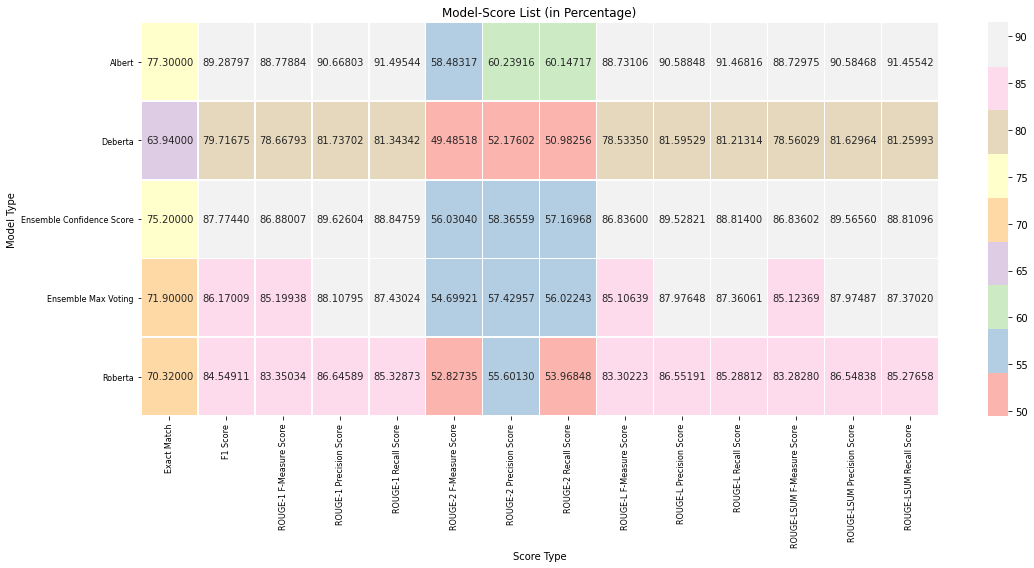

In [201]:
ax = plt.figure(figsize=(16, 8))
ax = sns.heatmap(model_scores_analysis_df, cmap='Pastel1', linewidths=0.5, annot=True, fmt=".5f")
ax.set_title("Model-Score List (in Percentage)", size = 12)
ax.set_xlabel("Score Type", size = 10)
ax.set_ylabel("Model Type", size = 10)
ax.tick_params(axis = 'both', labelsize = 8)
ax.figure.tight_layout()
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
fig = ax.get_figure()
fig.savefig('./drive/MyDrive/Research_Transformer/graphs/Model Score List.jpeg')
plt.show()

## Distribution of the superior models in case of Ensemble Confidence Score

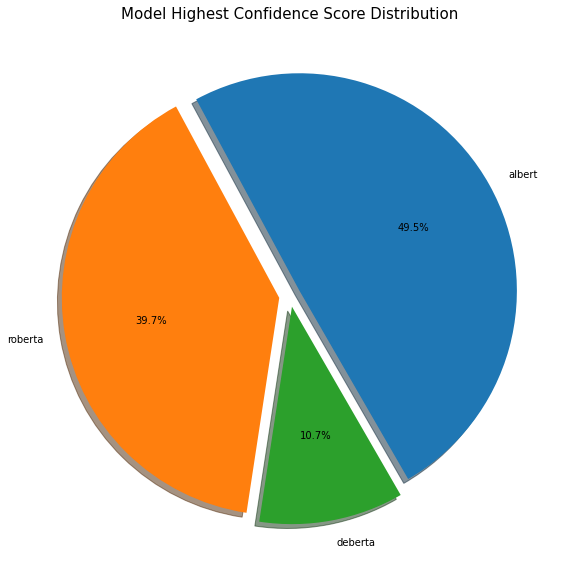

In [202]:
fig = plt.figure(figsize=(10,10))
temp_series = ensemble_confidence_score_df['ensemble_model_type'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=300,shadow=True, explode=[0.05, 0.05, 0.05])
plt.title("Model Highest Confidence Score Distribution", fontsize=15)
fig.savefig('./drive/MyDrive/Research_Transformer/graphs/Model Highest Confidence Score Distribution.jpeg')
plt.show()

## Distribution of the superior models in case of Ensemble Max Voting

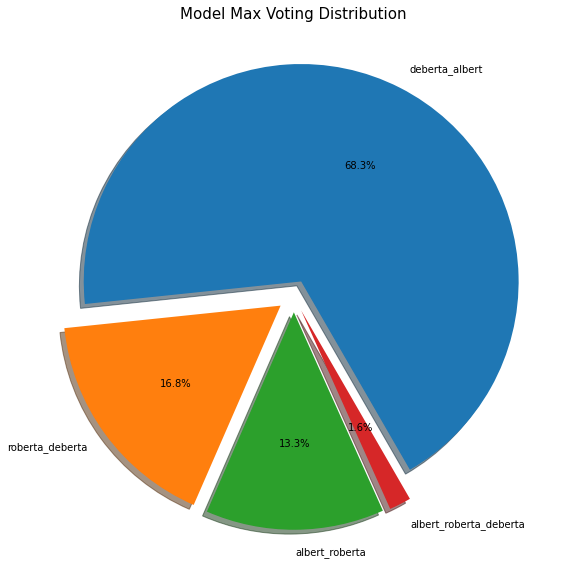

In [203]:
fig = plt.figure(figsize=(10,10))
temp_series = ensemble_max_voting_df['max_voting_model_type'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=300,shadow=True, explode=[0.075, 0.075, 0.075, 0.075])
plt.title("Model Max Voting Distribution", fontsize=15)
fig.savefig('./drive/MyDrive/Research_Transformer/graphs/Model Max Voting Distribution.jpeg')
plt.show()